In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from nistats.design_matrix import _make_drift

# Drifts generated in nistats
 Nistatis is a package for modeling and statistical inference on fMRI data in Python.
 
 Let's check cosine drifts first:

[0, 200, -1, 1.5]

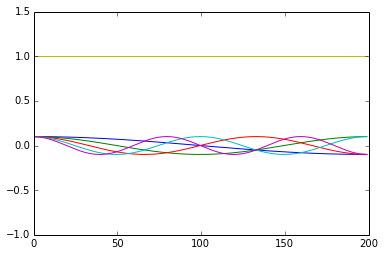

In [3]:
drifts1 = _make_drift('cosine', frame_times=np.arange(200), period_cut=64)
plt.plot(drifts1[0])
plt.axis([0,200,-1,1.5])

Now polynomial drifts

[0, 200, -1, 1.5]

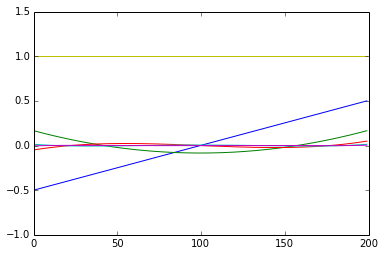

In [4]:
drifts2 = _make_drift('polynomial', frame_times=np.arange(200), order=5)
plt.plot(drifts2[0])
plt.axis([0,200,-1,1.5])

# Drifts that we generate in pyhrf
They are polynomial

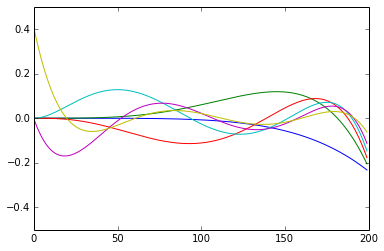

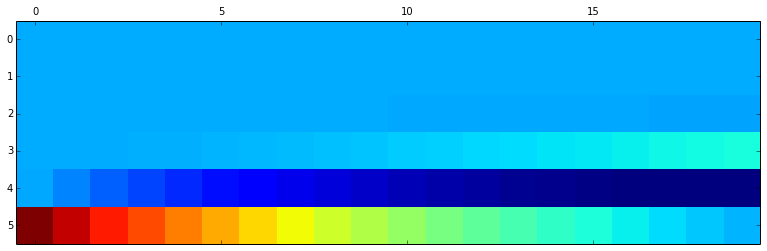

In [5]:
from pyhrf.vbjde.vem_tools import PolyMat
drifts3 = PolyMat(200, 5, 1)
plt.plot(drifts3)
plt.axis([0,200,-0.5,0.5])
plt.matshow(drifts3[:20, :].T)

## What if we orthogonalize them? 

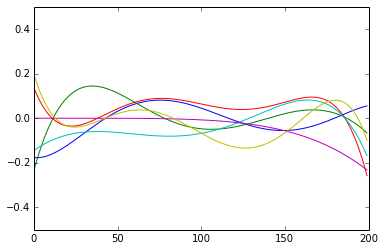

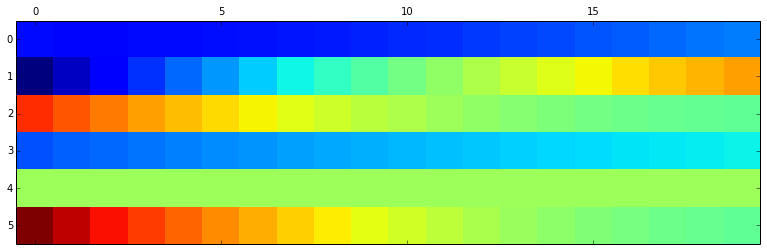

In [6]:
import scipy as sp
drifts4 = np.array(sp.linalg.orth(drifts3))
plt.plot(drifts4)
plt.axis([0,200,-0.5,0.5])
plt.matshow(drifts4[:20, :].T)

In [7]:
print drifts1[0].shape
print drifts2[0].shape
print drifts3.shape

(200, 6)
(200, 6)
(200, 6)


# Are they orthogonal?
Orthogonal means:  $\langle x, y \rangle = 0$, so here $$P^T P = Id$$.

In [8]:
drifts1[0].T.dot(drifts1[0])


array([[  1.00000000e+00,  -4.21537805e-16,   1.00613962e-16,
         -1.38777878e-16,   9.19403442e-17,  -1.38777878e-17],
       [ -4.21537805e-16,   1.00000000e+00,  -3.29597460e-17,
          1.68268177e-16,  -6.93889390e-17,   9.29811783e-16],
       [  1.00613962e-16,  -3.29597460e-17,   1.00000000e+00,
         -8.67361738e-18,   7.28583860e-17,  -4.71844785e-16],
       [ -1.38777878e-16,   1.68268177e-16,  -8.67361738e-18,
          1.00000000e+00,   5.55111512e-17,   1.02695630e-15],
       [  9.19403442e-17,  -6.93889390e-17,   7.28583860e-17,
          5.55111512e-17,   1.00000000e+00,  -1.58206781e-15],
       [ -1.38777878e-17,   9.29811783e-16,  -4.71844785e-16,
          1.02695630e-15,  -1.58206781e-15,   2.00000000e+02]])

In [9]:
drifts2[0].T.dot(drifts2[0])


array([[  1.68341709e+01,   1.05887521e-14,   9.77343206e-15,
         -3.51801921e-15,   1.93040028e-14,  -7.21644966e-15],
       [  1.05887521e-14,   1.13347221e+00,  -3.79904441e-15,
         -1.98539102e-15,   6.11598445e-16,   1.22124533e-15],
       [  9.77343206e-15,  -3.79904441e-15,   7.35836732e-02,
          8.96093096e-16,   3.89797786e-16,  -1.11022302e-16],
       [ -3.51801921e-15,  -1.98539102e-15,   8.96093096e-16,
          4.71716417e-03,   1.50641760e-15,  -8.03523914e-15],
       [  1.93040028e-14,   6.11598445e-16,   3.89797786e-16,
          1.50641760e-15,   3.00613260e-04,  -2.17499629e-14],
       [ -7.21644966e-15,   1.22124533e-15,  -1.11022302e-16,
         -8.03523914e-15,  -2.17499629e-14,   2.00000000e+02]])

In [10]:
drifts3.T.dot(drifts3)

array([[  1.00000000e+00,  -6.59194921e-17,  -3.60822483e-16,
          1.21430643e-16,  -1.63064007e-16,   1.12757026e-16],
       [ -6.59194921e-17,   1.00000000e+00,  -2.42861287e-17,
          5.55111512e-17,  -4.51028104e-17,   3.98986399e-17],
       [ -3.60822483e-16,  -2.42861287e-17,   1.00000000e+00,
          2.04697370e-16,  -3.38271078e-17,   8.32667268e-17],
       [  1.21430643e-16,   5.55111512e-17,   2.04697370e-16,
          1.00000000e+00,   2.66280054e-16,  -4.77048956e-18],
       [ -1.63064007e-16,  -4.51028104e-17,  -3.38271078e-17,
          2.66280054e-16,   1.00000000e+00,   1.90169061e-16],
       [  1.12757026e-16,   3.98986399e-17,   8.32667268e-17,
         -4.77048956e-18,   1.90169061e-16,   1.00000000e+00]])

In [11]:
drifts4.T.dot(drifts4)

array([[  1.00000000e+00,   9.71445147e-17,  -2.96637714e-16,
         -5.20417043e-18,   4.68375339e-17,   1.78676518e-16],
       [  9.71445147e-17,   1.00000000e+00,  -3.74700271e-16,
          2.15973073e-16,   5.89805982e-17,   5.03069808e-17],
       [ -2.96637714e-16,  -3.74700271e-16,   1.00000000e+00,
          1.11022302e-16,  -2.08166817e-17,  -8.76035355e-17],
       [ -5.20417043e-18,   2.15973073e-16,   1.11022302e-16,
          1.00000000e+00,   3.81639165e-17,   1.00613962e-16],
       [  4.68375339e-17,   5.89805982e-17,  -2.08166817e-17,
          3.81639165e-17,   1.00000000e+00,  -1.56125113e-17],
       [  1.78676518e-16,   5.03069808e-17,  -8.76035355e-17,
          1.00613962e-16,  -1.56125113e-17,   1.00000000e+00]])

# Are they orthonormal?
In linear algebra, two vectors in an inner product space are orthonormal if they are orthogonal and unit vectors. We already checked if they were orthogonal. Now are they unit vectors?

In [19]:
print 'nistats cosine drifts vector norms: ', np.linalg.norm(drifts1[0], axis=0)
print 'nistats polynomial drifts vector norms: ', np.linalg.norm(drifts2[0], axis=0)
print 'pyhrf polynomial drifts vector norms: ', np.linalg.norm(drifts3, axis=0)
print 'pyhrf polynomial drifts vector norms, after orthogonalization: ', np.linalg.norm(drifts4, axis=0)

nistats cosine drifts vector norms:  [  1.           1.           1.           1.           1.          14.14213562]
nistats polynomial drifts vector norms:  [  4.10294661   1.06464652   0.27126311   0.06868161   0.0173382
  14.14213562]
pyhrf polynomial drifts vector norms:  [ 1.  1.  1.  1.  1.  1.]
pyhrf polynomial drifts vector norms, after orthogonalization:  [ 1.  1.  1.  1.  1.  1.]


### Pyhrf drifts are orthogonal and othonormal. nistats drifts are orthogonal but not orthonormal. However, I was wrong and in pyhrf, the drifts generated do not have a constant drift!!